In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt

tw=pd.read_csv('tweets.csv', encoding= 'ISO-8859-1')
#this might cause an error, as this file not coded with utf-8..one way to overcome
#this is to specify encoding='ISO-8859-1' 



In [4]:
tw.drop(['Unnamed: 0','X'],axis=1,inplace=True) #axis=1 is for columns
tw.head()


,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [5]:
tw.columns

Index(['text', 'favorited', 'favoriteCount', 'replyToSN', 'created',
       'truncated', 'replyToSID', 'id', 'replyToUID', 'statusSource',
       'screenName', 'retweetCount', 'isRetweet', 'retweeted'],
      dtype='object')

In [6]:
txt=tw['text'].copy()

In [11]:
print('text before cleaning')
txt[1]

text before cleaning


'RT @Hemant_80: Did you vote on #Demonetization on Modi survey app?'

In [9]:
def text_clean(tweet):
    text=re.sub('RT','',tweet)
    text=re.sub('&amp','',text)
    text=re.sub('<U\+[\w]+>','',text)
    text=re.sub('<ed>','',text)
    text=re.sub('http[s]?.+','',text)
    text=re.sub(r'[?!.;:,#@-]', '', text)
    text = text.lower()
    return text

text=txt.apply(text_clean)

In [12]:
print('text after cleaning')
text[1]

text after cleaning


' hemant_80 did you vote on demonetization on modi survey app'

In [13]:
def genWordList(tweets):
    word_list=[];
    for wrd in tweets.split():
        word_list.extend(wrd)
    word_freq=pd.Series(word_list).value_counts()
    return word_freq

word_freq=genWordList(text.str)

print('generating word_freq list for making word cloud')
word_freq[:30]

generating word_freq list for making word cloud


demonetization     14016
to                  7681
is                  5339
the                 5080
in                  4670
of                  4093
and                 2893
on                  2791
modi                2738
pm                  2719
india               2715
a                   2374
that                2201
out                 1846
so                  1752
for                 1719
who                 1624
had                 1603
narendra            1566
rich                1511
by                  1496
after               1428
find                1422
dear                1410
implement           1399
evanspiegel         1388
actually            1374
from                1359
have                1336
urautelaforever     1273
dtype: int64

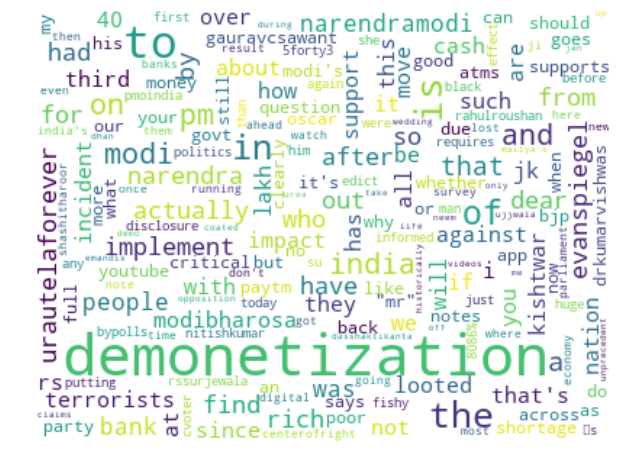

In [16]:
#importing wordcloud library
from wordcloud import WordCloud

wc=WordCloud(width=400, height=300, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')#no need of axis counts
plt.show()

In [17]:
#one disadvantage of the above word cloud is that, it has many stop words-is as with not the etc..we need to remove them
from wordcloud import STOPWORDS
print(STOPWORDS)

{'below', 'over', 'while', "who's", "you'll", 'at', 'its', "you're", 'how', 'your', 'few', 'was', 'itself', 'had', "doesn't", "they're", "they've", 'like', 'ever', 'very', 'his', 'who', 'yourself', "what's", 'their', 'doing', 'she', 'which', "didn't", "that's", 'other', 'herself', 'an', "they'd", 'i', 'through', 'into', 'theirs', 'whom', "shan't", "we're", 'if', 'not', 'again', 'having', 'they', 'why', 'been', "he'd", 'being', 'k', 'once', "i'm", 'themselves', 'each', 'any', "how's", 'www', 'do', "hasn't", "why's", 'can', 'or', 'when', "aren't", 'as', "she'd", "weren't", 'hers', "couldn't", 'com', 'above', 'what', 'himself', 'same', 'nor', 'yourselves', 'before', 'did', 'some', 'ours', 'all', "isn't", 'during', "she's", "we'll", "it's", 'than', 'there', "we've", 'ourselves', "let's", "when's", 'has', 'my', 'myself', "you'd", 'a', 'such', "they'll", 'does', "hadn't", 'but', 'him', 'no', 'off', 'that', 'those', 'own', 'cannot', 'else', "here's", 'he', 'would', "can't", 'shall', 'in', "i'

In [18]:
#above printed stop words will be removed
word_freq=word_freq.drop(labels=STOPWORDS,errors='ignore') #if any of the stopwords are not present in our tweets 
#then we will ignore them
word_freq[:30] #compare them with earier word_freq

demonetization     14016
modi                2738
pm                  2719
india               2715
narendra            1566
rich                1511
find                1422
dear                1410
implement           1399
evanspiegel         1388
actually            1374
urautelaforever     1273
narendramodi        1158
people              1086
bank                1029
will                 955
rs                   738
impact               700
lakh                 685
support              677
cash                 671
terrorists           658
jk                   638
nation               593
third                552
looted               547
incident             547
40                   544
move                 544
kishtwar             544
dtype: int64

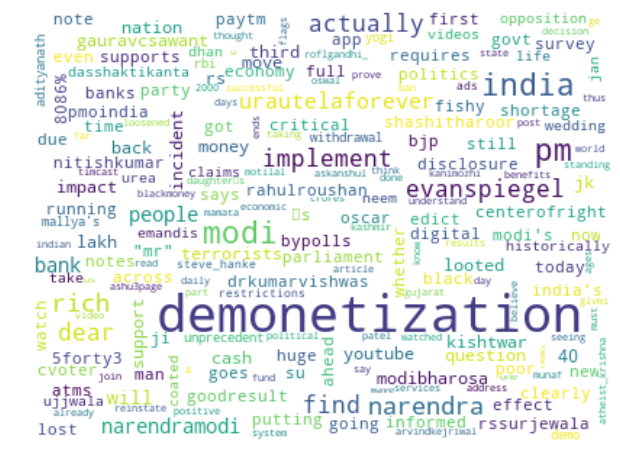

In [19]:
wc=WordCloud(width=400, height=300, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')#no need of axis counts
plt.show()